<a href="https://colab.research.google.com/github/BattalovTN/Battalov_statprak/blob/main/ProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Cyber Security Attacks***
Авторы: Батталов Тамерлан 331

## **Введение**

***Постановка задачи***

Исследуется синтетический датасет Cybersecurity Attacks (https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks), содержащий метаданные сетевых потоков. Основная цель — построить модель машинного обучения, которая классифицирует трафик и запросы.

### ***Датасет включает следующие ключевые поля:***

*   Время и IP-адреса (источник, назначение)
*   Порты , протоколы (TCP, UDP, ICMP)
*   Тип атаки (Malware, DDoS, Intrusion)
*   Паттерны атак (Known Pattern A/B)
*   Метки IoC (Indicators of Compromise)
*   Уровень угрозы (Low, Medium, High)
*   и т.д.




### ***Цели исследования***

**1. Разведочный анализ данных (EDA):**

* Выявить ключевые признаки, коррелирующие с целевой переменной.
* Обработать пропуски, закодировать категориальные переменные
* Исследовать распределения и зависимости между признаками.

**2. Построение моделей:**

* Градиентный бустинг
* kNN (k-ближайших соседей)
* XGBoost
* Random Forest
* Логистическая регрессия




# Разведочный анализ данных (EDA)
### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

np.random.seed(42)

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "figure.dpi": 300,
})

from tqdm.auto import tqdm


### Загрузка данных, обзор.

In [2]:
# Загрузка данных
df = pd.read_csv('cybersecurity_attacks.csv')

# Очистка памяти после загрузки
gc.collect()

# Вывод размера датасета
df.shape

(40000, 25)

In [3]:
# Обзор
display(df.sample(7, random_state=42))
df.info(verbose=True, show_counts=True)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
32823,2022-03-21 14:15:51,65.126.89.188,48.167.47.144,59855,56736,UDP,1402,Control,HTTP,Explicabo voluptatem veniam. Qui sequi accusan...,...,Logged,Medium,Ayesha Khurana,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_7 ...,Segment B,"Begusarai, Tripura",38.89.175.22,NaN,NaN,Firewall
16298,2022-03-24 00:20:34,20.97.15.71,129.157.131.193,47259,27663,ICMP,855,Control,FTP,Ipsa dignissimos possimus quisquam. Laudantium...,...,Logged,Medium,Kimaya Thaker,Opera/8.63.(X11; Linux i686; hne-IN) Presto/2....,Segment B,"Jabalpur, Jharkhand",NaN,Log Data,NaN,Server
28505,2022-01-28 11:55:36,7.27.208.195,103.46.68.72,1659,19097,ICMP,297,Data,DNS,Ea voluptates temporibus iste sunt rem. Optio ...,...,Logged,High,Rhea Deshmukh,Opera/9.32.(X11; Linux x86_64; nn-NO) Presto/2...,Segment A,"Asansol, Assam",3.113.185.207,Log Data,Alert Data,Server
6689,2023-06-13 02:16:32,160.157.150.216,207.176.114.6,10171,48022,ICMP,1090,Control,DNS,Similique sint doloremque adipisci.\nUt expedi...,...,Logged,High,Kaira Choudhary,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,Segment C,"Morena, Arunachal Pradesh",NaN,NaN,NaN,Firewall
26893,2021-12-04 19:40:16,93.229.203.116,181.60.4.157,61461,13536,TCP,330,Control,FTP,Provident quidem saepe ullam. Inventore quod s...,...,Ignored,High,Neysa Bakshi,Opera/9.48.(Windows NT 5.01; ja-JP) Presto/2.9...,Segment C,"Kirari Suleman Nagar, Manipur",146.14.175.94,NaN,NaN,Firewall
36572,2021-07-16 08:43:03,148.37.16.82,56.224.191.183,42114,64246,UDP,641,Data,FTP,Minus illum ut aliquam. Assumenda vitae cum ex...,...,Logged,Low,Yuvaan Bansal,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment B,"Dhule, Punjab",2.155.72.233,NaN,Alert Data,Server
12335,2022-11-28 18:43:15,121.190.14.3,90.156.132.16,35092,65499,UDP,1048,Control,FTP,Laborum itaque consequatur cupiditate labore c...,...,Ignored,Low,Vaibhav Lall,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment B,"Mumbai, Uttarakhand",NaN,Log Data,Alert Data,Server


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [4]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [5]:
#Ненужные данные
df.drop(columns=['Source IP Address', 'Source Port', 'Destination Port', 'Destination IP Address', 'Payload Data', 'Proxy Information', 'Geo-location Data', 'User Information', ], inplace=True)

### Проверка отсутствующих/нулевых значений

In [6]:
df.isnull().sum().sort_values(ascending=False)

,0
Alerts/Warnings,20067
IDS/IPS Alerts,20050
Malware Indicators,20000
Firewall Logs,19961
Timestamp,0
Traffic Type,0
Packet Type,0
Protocol,0
Packet Length,0
Attack Type,0


#### Отсутствующие значения

In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
Alerts/Warnings,20067
IDS/IPS Alerts,20050
Malware Indicators,20000
Firewall Logs,19961
Timestamp,0
Traffic Type,0
Packet Type,0
Protocol,0
Packet Length,0
Attack Type,0


Все отсутствующие значения удалены

### Устройства, браузер, колонки с датами

In [8]:
df['Device Information'].value_counts()

,count
Device Information,
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0),35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1),34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0),33
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1),31
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0),31
...,...
Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gecko/6248-04-01 13:49:59 Firefox/3.8,1
"Mozilla/5.0 (iPad; CPU iPad OS 10_3_3 like Mac OS X) AppleWebKit/531.1 (KHTML, like Gecko) CriOS/31.0.870.0 Mobile/22W332 Safari/531.1",1
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8 rv:2.0; kk-KZ) AppleWebKit/532.10.1 (KHTML, like Gecko) Version/4.0.2 Safari/532.10.1",1


Создаём колонку браузера

In [9]:
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [10]:
df['Browser']

,Browser
0,Mozilla
1,Mozilla
2,Mozilla
3,Mozilla
4,Mozilla
...,...
39995,Mozilla
39996,Mozilla
39997,Mozilla
39998,Mozilla


Создаём колонку Девайса/ОС

In [11]:
import re
#Шаблоны
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I делает поиск нечувствительным к регистру
        if match:
            return match.group()
    return 'Unknown'  # если нет паттерна

# Извлекаем Девайс/ОС
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [12]:
df['Browser'].value_counts()

,count
Browser,
Mozilla,31951
Opera,8049


In [13]:
df['Device/OS'].value_counts()

,count
Device/OS,
Windows,17953
Linux,8840
Macintosh,5813
iPod,2656
Android,1620
iPhone,1567
iPad,1551


Удаление столбца информации об устройстве

In [14]:
df = df.drop('Device Information', axis = 1)

Все пропущенные значения обработаны, займёмся временем

In [15]:
def extract_time_features(df, Timestamp):
    # Преобразование колонки Timestamp во время
    df[Timestamp] = pd.to_datetime(df[Timestamp])

    # Выделение колонок
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek

    return df

In [16]:
new_df = extract_time_features(df, 'Timestamp')

In [17]:
#Ненужные данные
df.drop(columns=['Timestamp' ], inplace=True)

In [18]:
df.head().T

,0,1,2,3,4
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Malware Indicators,IoC Detected,IoC Detected,IoC Detected,NaN,NaN
Anomaly Scores,28.67,51.5,87.42,15.79,0.52
Alerts/Warnings,NaN,NaN,Alert Triggered,Alert Triggered,Alert Triggered
Attack Type,Malware,Malware,DDoS,Malware,DDoS
Attack Signature,Known Pattern B,Known Pattern A,Known Pattern B,Known Pattern B,Known Pattern B
Action Taken,Logged,Blocked,Ignored,Blocked,Blocked


In [19]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Browser', 'Device/OS', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'DayOfWeek'],
      dtype='object')

### Некоторые графики

In [20]:
plt = px.histogram(df, x = 'Day', color = 'Malware Indicators', title = 'Количество атак в этот день')
plt.show()

In [21]:
plt = px.histogram(df, x = 'Month', color = 'Malware Indicators', title = 'Количество атак в этот месяц')
plt.show()

In [22]:
plt = px.histogram(df, x = 'Year', color = 'Malware Indicators', title = 'Количество атак в этот год')
plt.show()

In [23]:
# Browsers Distribution
plt = px.pie(df, names = 'Browser', title = 'Браузеры')
plt.show()

In [24]:
plt = px.pie(df, names = 'Device/OS', title = 'Девайсы/ОС')
plt.show()

In [25]:
plt = px.histogram(df, x ='Device/OS', color= 'Browser', title = 'Браузер по девайсам/ОС')
plt.show()

In [26]:
plt = px.histogram(df, x= 'Device/OS', color = 'Attack Type', title = 'Количество атак по девайсам/ОС')
plt.show()

In [27]:
plt = px.histogram(df, x= 'Browser', color='Attack Type', title= 'Количество атак по браузерам')
plt.show()

###Работа с числовыми признаками

In [28]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

In [29]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Packet Length,40000.0,781.452725,416.044192,64.0,420.00,782.000,1143.00,1500.0
Anomaly Scores,40000.0,50.113473,28.853598,0.0,25.15,50.345,75.03,100.0
Year,40000.0,2021.411375,1.085253,2020.0,2020.00,2021.000,2022.00,2023.0
Month,40000.0,6.288275,3.332979,1.0,3.00,6.000,9.00,12.0
Day,40000.0,15.629550,8.771715,1.0,8.00,16.000,23.00,31.0
Hour,40000.0,11.507350,6.919122,0.0,5.00,12.000,17.00,23.0
Minute,40000.0,29.511825,17.360543,0.0,14.00,29.000,45.00,59.0
Second,40000.0,29.591300,17.357387,0.0,14.00,30.000,45.00,59.0
DayOfWeek,40000.0,2.995750,2.004515,0.0,1.00,3.000,5.00,6.0


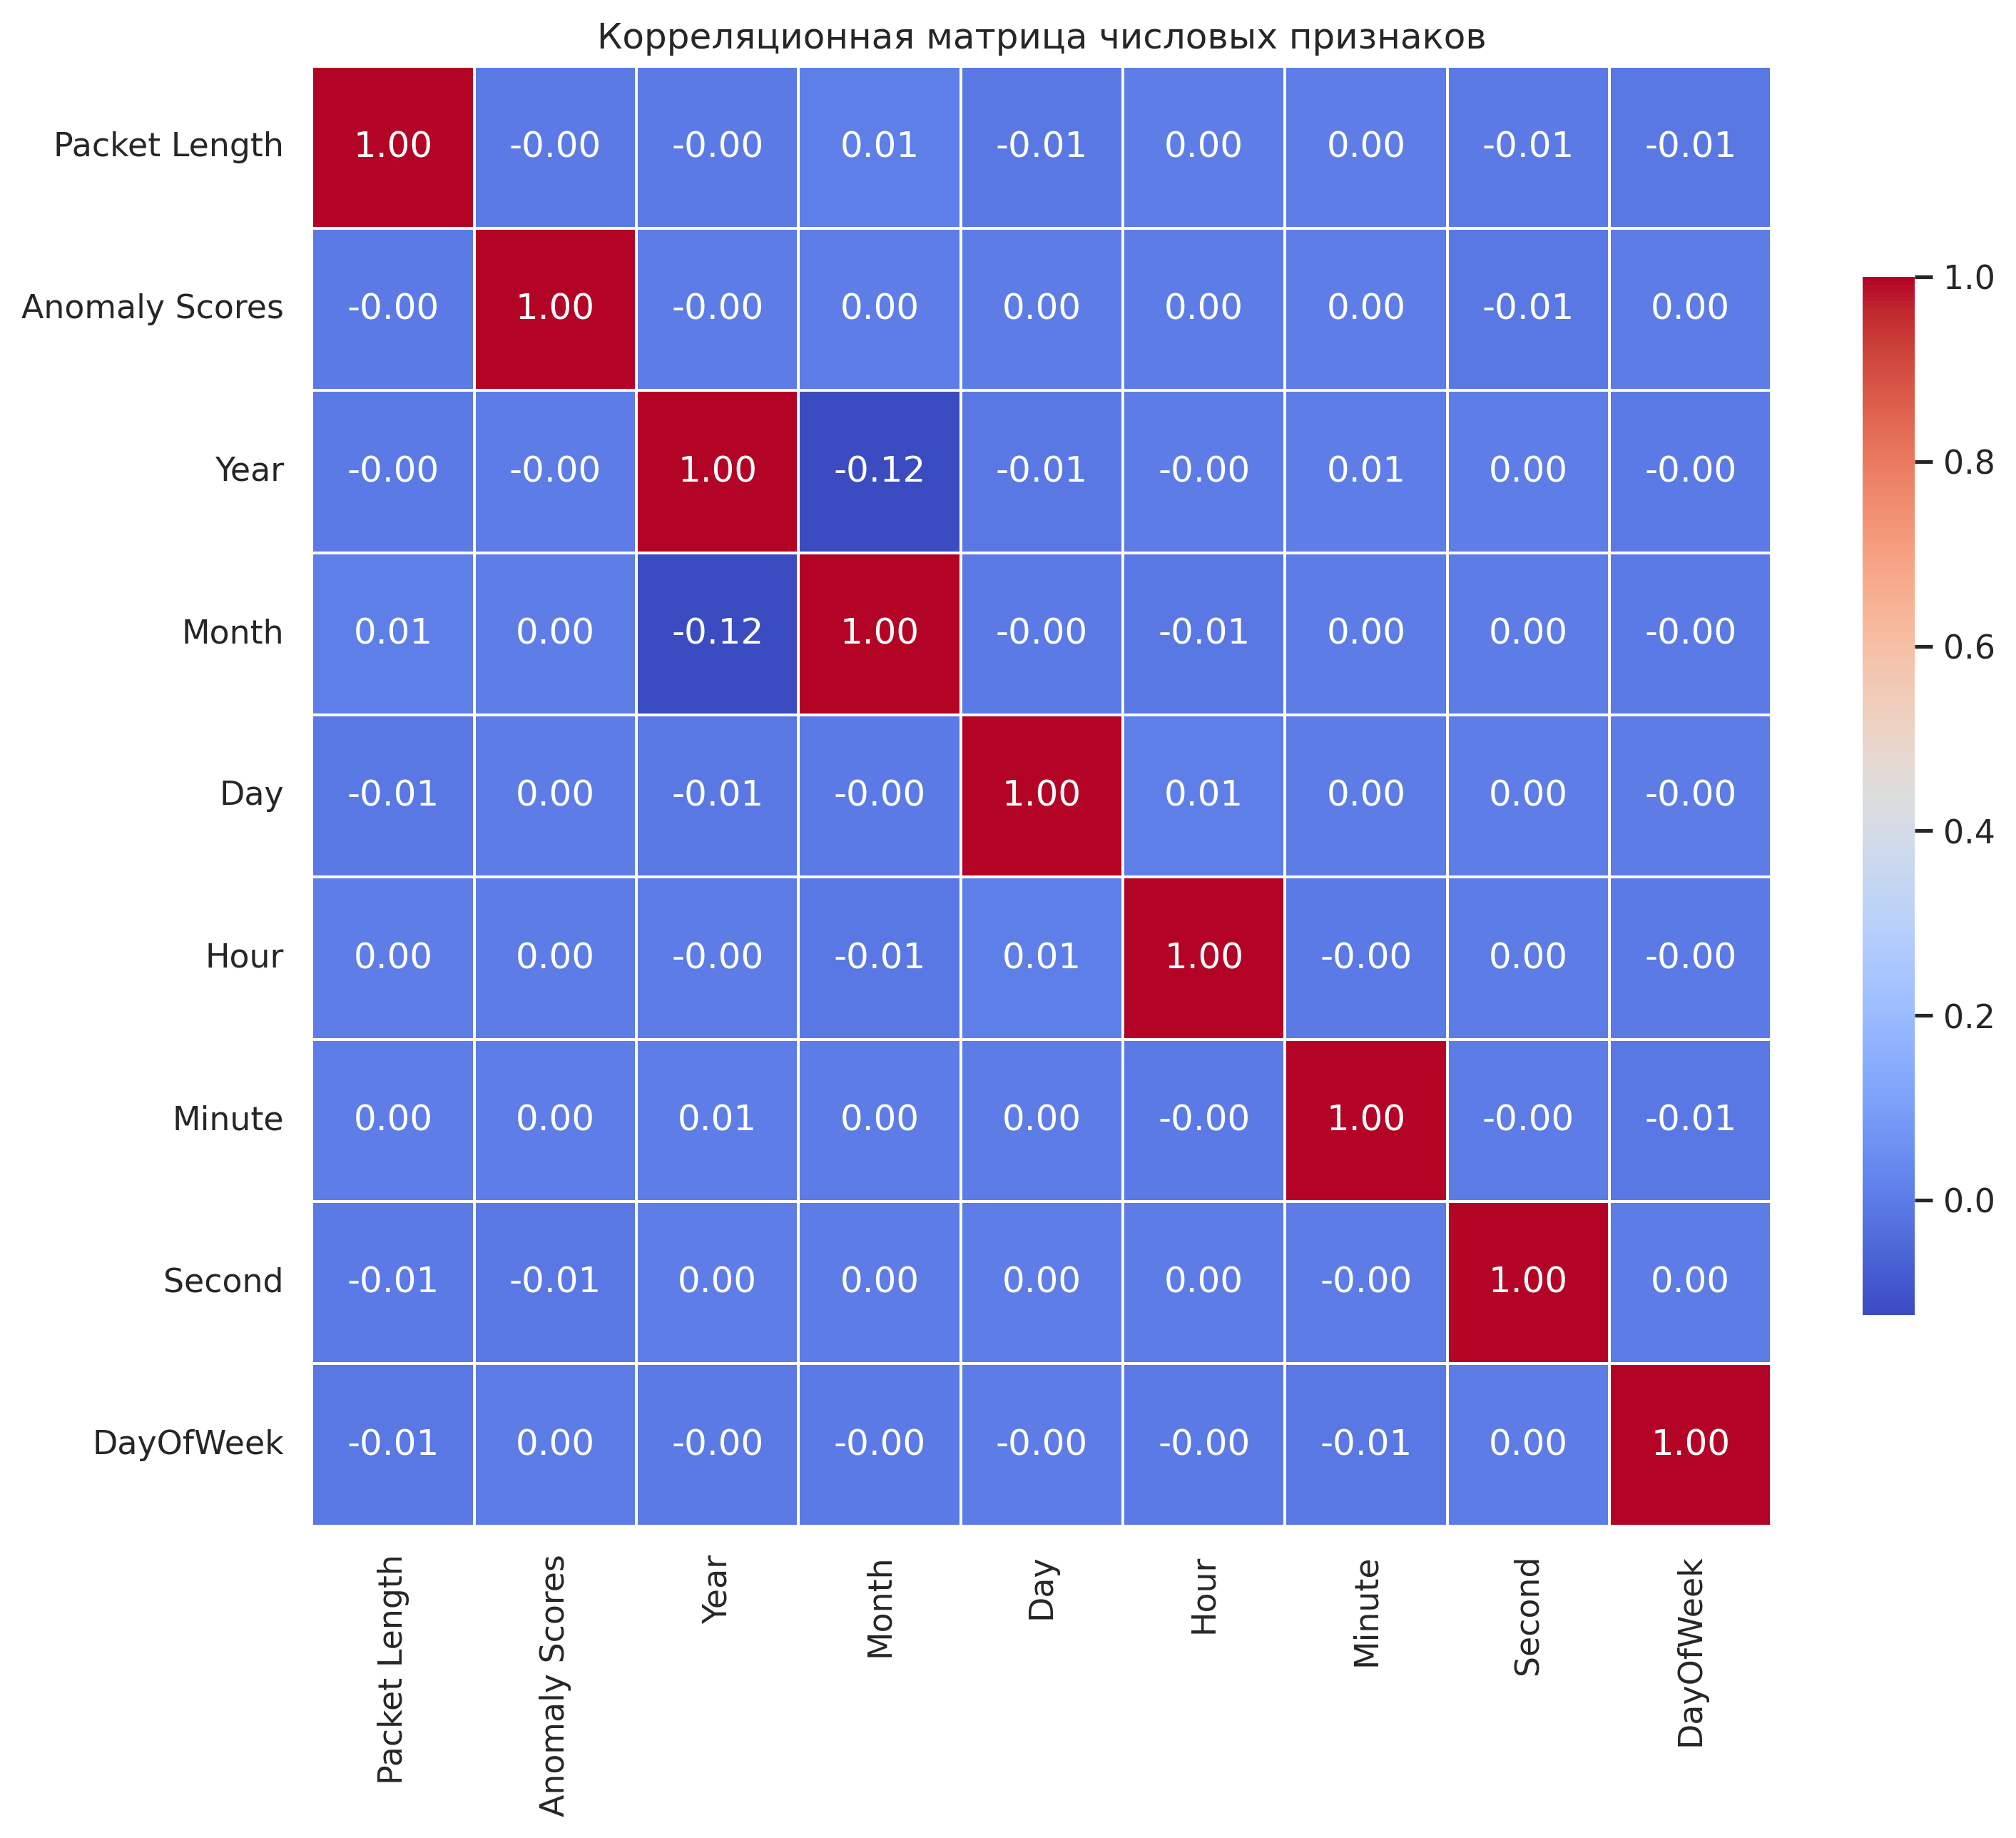

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[numeric_cols].corr(method="pearson")

sns.set_theme(style="whitegrid", context="notebook")

plt.figure(figsize=(11, 9))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5,
    cbar_kws={"shrink": .7},
    square=True
)

plt.title("Корреляционная матрица числовых признаков")
plt.show()

#Модели

### Преобразование признаков (было попробовано несколько методов)

In [31]:
# Преобразование категориальных признаков в числовые

import pandas as pd


df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek', 'Browser'], inplace=True)
df.drop(columns=['Device/OS', 'Protocol', 'Traffic Type', 'Network Segment', 'Attack Type', 'Attack Signature', 'Log Source', 'Packet Type'], inplace=True)

# Преобразование колонки 'Protocol'
#df['Protocol'] = df['Protocol'].replace({'ICMP': 0, 'TCP': 1, 'UDP': 2})

# Преобразование колонки 'Traffic Type'
#df['Traffic Type'] = df['Traffic Type'].replace({'HTTP': 0, 'DNS': 1, 'FTP': 2})

# Преобразование колонки 'Network Segment'
#df['Network Segment'] = df['Network Segment'].replace({'Segment A': 0, 'Segment B': 1, 'Segment C': 2})

# Преобразование колонки 'Attack Type'
#df['Attack Type'] = df['Attack Type'].replace({'Malware': 0, 'DDoS': 1, 'Intrusion': 2})

# Преобразование колонки 'Security Level'
df['Severity Level'] = df['Severity Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# Преобразование колонки 'Action Taken'
df['Action Taken'] = df['Action Taken'].replace({'Ignored': 1, 'Logged': 2, 'Blocked': 3})

# Преобразование колонки 'Attack Signature'
#df['Attack Signature'] = df['Attack Signature'].replace({'Known Pattern B': 0, 'Known Pattern A': 1})

# Преобразование колонки 'Log Source'
#df['Log Source'] = df['Log Source'].replace({'Firewall': 0, 'Server': 1})

# Преобразование колонки 'Packet Type'
#df['Packet Type'] = df['Packet Type'].replace({'Data': 0, 'Control': 1})

# Преобразование колонки 'Browser'
#df['Browser'] = df['Browser'].replace({'Mozilla': 0, 'Opera': 1})

# Преобразование колонки 'Malware Indicators'
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else -1)

# Преобразование колонки 'Alerts/Warnings'
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 1 if x == 'Alert Triggered' else -1)

# Преобразование колонки 'Firewall Logs'
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 1 if x == 'Log Data' else -1)

# Преобразование колонки 'IDS/IPS Alerts'
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 1 if x == 'Alert Data' else -1)


# Проверка результата
display(df.sample(3, random_state=42))
df.info(verbose=True, show_counts=True)
df['Severity Level'].value_counts()
df.columns

<ipython-input-31-f61b88ce523d>:22: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-31-f61b88ce523d>:25: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Action Taken,Severity Level,Firewall Logs,IDS/IPS Alerts
32823,1402,1,69.21,-1,2,2,-1,-1
16298,855,1,55.69,1,2,2,1,-1
28505,297,1,32.58,-1,2,3,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Packet Length       40000 non-null  int64  
 1   Malware Indicators  40000 non-null  int64  
 2   Anomaly Scores      40000 non-null  float64
 3   Alerts/Warnings     40000 non-null  int64  
 4   Action Taken        40000 non-null  int64  
 5   Severity Level      40000 non-null  int64  
 6   Firewall Logs       40000 non-null  int64  
 7   IDS/IPS Alerts      40000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.4 MB


Index(['Packet Length', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Action Taken', 'Severity Level', 'Firewall Logs',
       'IDS/IPS Alerts'],
      dtype='object')

### Градиентный бустинг

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Загрузка данных (предположим, у тебя уже есть DataFrame `df`)
# df = pd.read_csv("your_dataset.csv")  # если из файла

# Разделение на признаки и целевую переменную
X = df.drop('Severity Level', axis=1)
y = df['Severity Level']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Модель градиентного бустинга
gbc = GradientBoostingClassifier()

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания и отчёт
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.25      0.29      2673
           2       0.33      0.35      0.34      2729
           3       0.32      0.38      0.35      2598

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



### Посмотрим на самые важные признаки

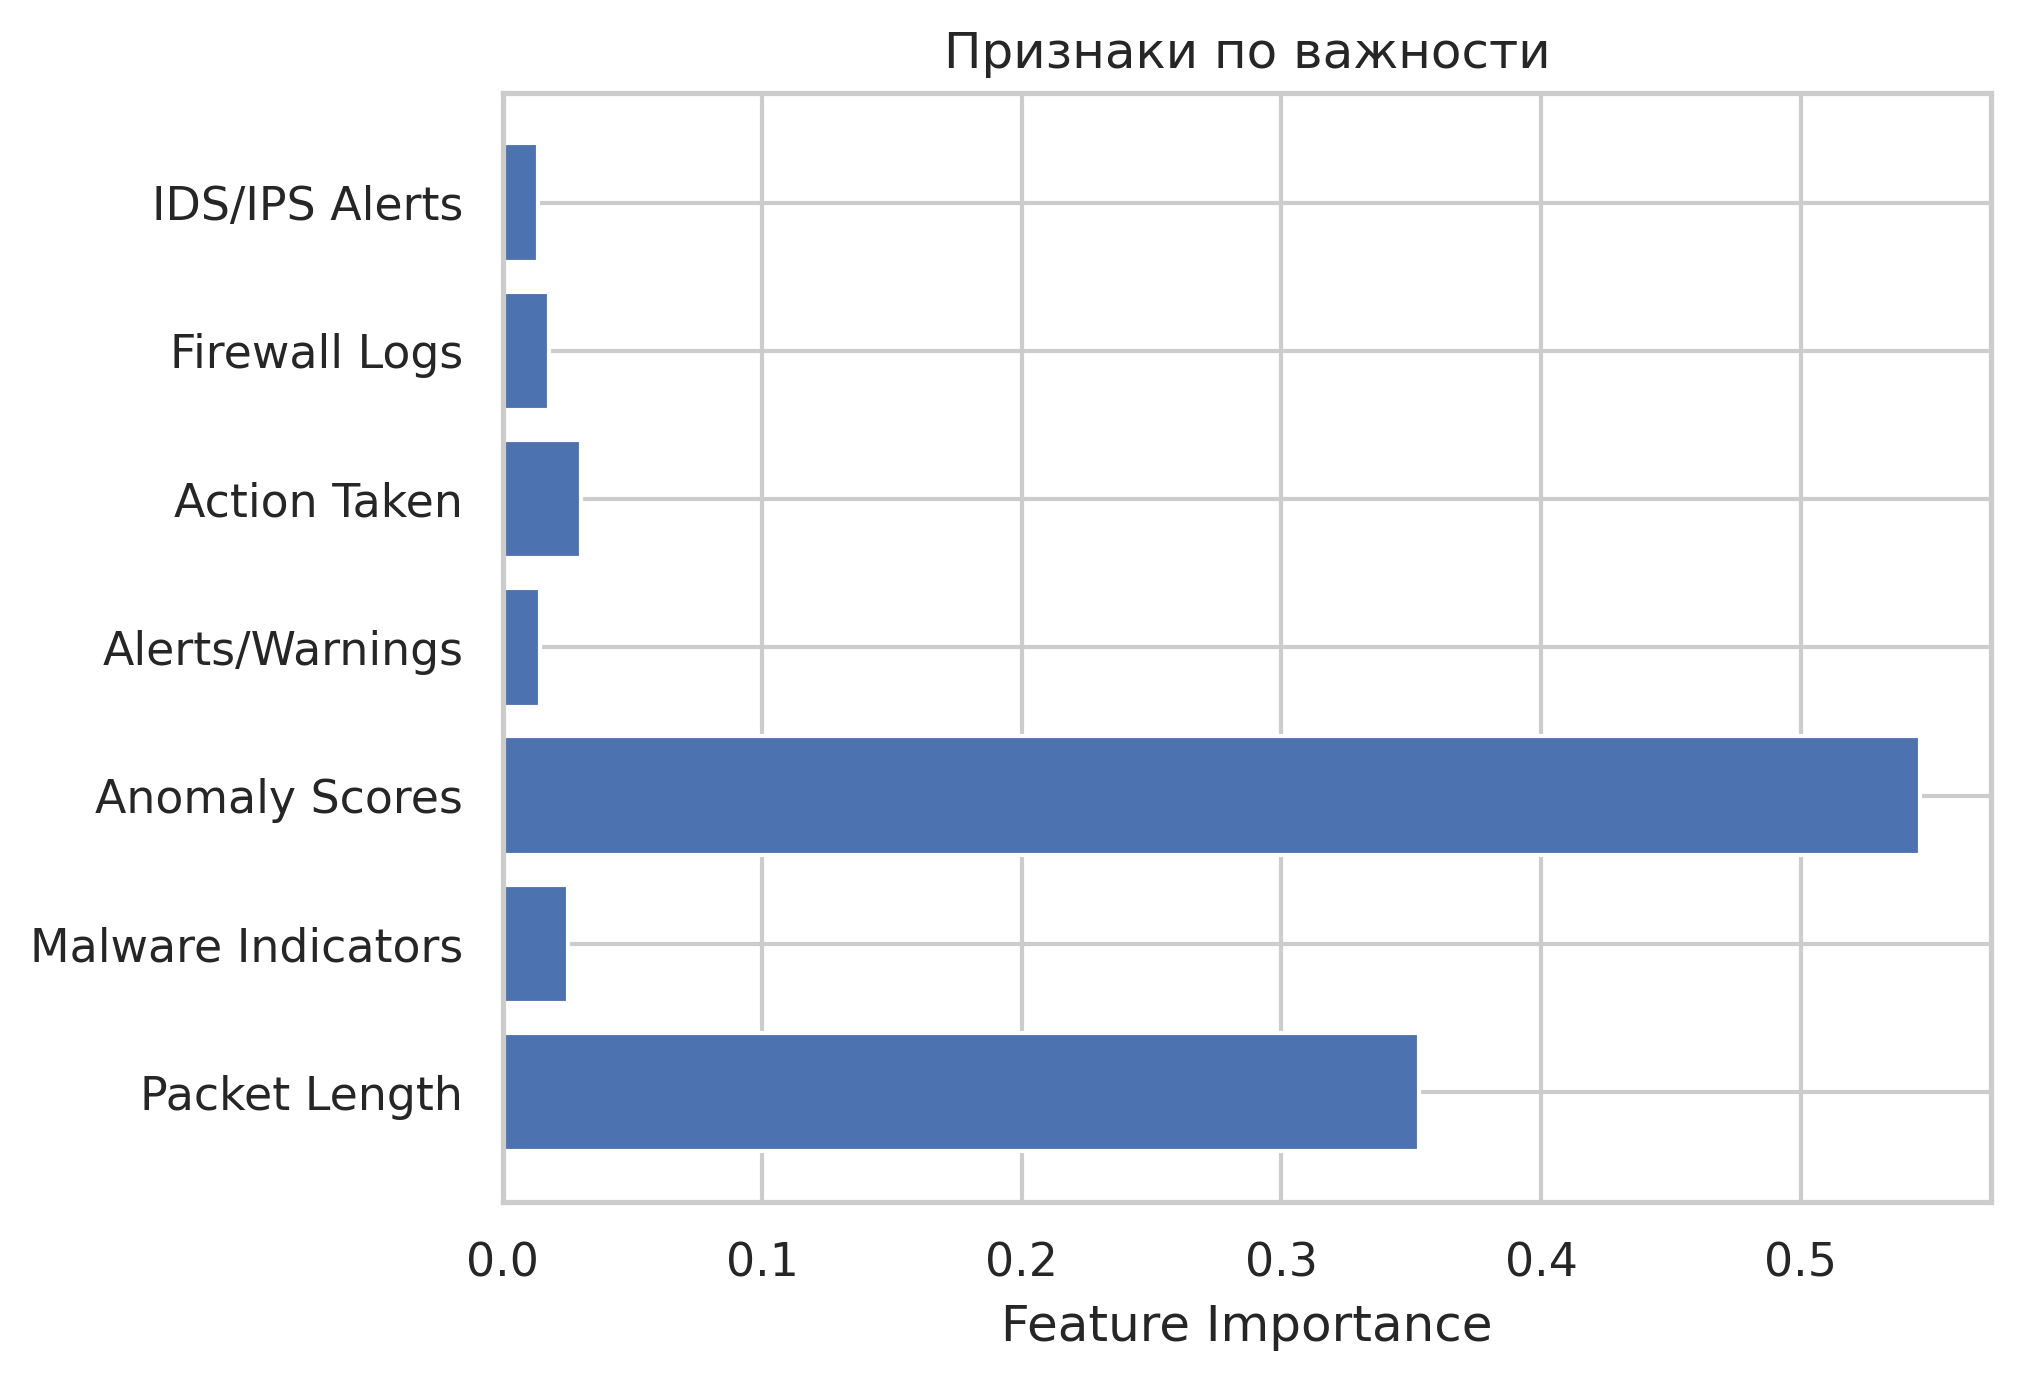

In [33]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = df.drop('Severity Level', axis=1).columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Признаки по важности")
plt.show()

### Градиентый бустинг, но с топ признаками

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Выбор топ-признаков
top_features = ['Anomaly Scores', 'Packet Length']
X = df[top_features]
y = df['Severity Level']

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модель градиентного бустинга
gbc = GradientBoostingClassifier()

# Параметры для GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.8, 1.0]
}

# Поиск по сетке
grid_search = GridSearchCV(
    gbc,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания и оценка
y_pred = best_model.predict(X_test)

print("🎯 Best parameters found:")
print(grid_search.best_params_)

print("\n📊 Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🎯 Best parameters found:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}

📊 Classification Report on Test Data:
              precision    recall  f1-score   support

           1       0.33      0.29      0.31      2637
           2       0.34      0.38      0.36      2687
           3       0.34      0.34      0.34      2676

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



### kNN с топ-признаками

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Топ-признаки
top_features = ['Anomaly Scores', 'Packet Length']
X = df[top_features]
y = df['Severity Level']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модель kNN
knn = KNeighborsClassifier()

# Параметры для GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

# Поиск по сетке
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search.fit(X_train, y_train)

# Лучшая модель
best_knn = grid_search.best_estimator_

# Предсказания
y_pred = best_knn.predict(X_test)

# Результаты
print("🎯 Best kNN parameters:")
print(grid_search.best_params_)

print("\n📊 Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🎯 Best kNN parameters:
{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

📊 Classification Report on Test Data:
              precision    recall  f1-score   support

           1       0.33      0.40      0.36      2637
           2       0.34      0.35      0.35      2687
           3       0.34      0.26      0.29      2676

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



### XGBoost (поменяли целевой признак и работаем не только с топ-признаками)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

y = df['Malware Indicators'].replace(-1, 0)
X = df.drop(columns=['Malware Indicators'])

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модель XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Поиск по сетке
grid_search = GridSearchCV(
    xgb,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)

# Результаты
print("🎯 Best Parameters Found:")
print(grid_search.best_params_)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[01:28:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




🎯 Best Parameters Found:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.50      4000
           1       0.49      0.49      0.49      4000

    accuracy                           0.49      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.49      0.49      0.49      8000



### Случайный лес

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Целевая переменная
y = df['Malware Indicators']
X = df.drop(columns=['Malware Indicators'])

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модель Random Forest
rf = RandomForestClassifier(random_state=42)

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Поиск по сетке
grid_search_rf = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search_rf.fit(X_train, y_train)

# Предсказания
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Результаты
print("🌲 Best Random Forest Parameters:")
print(grid_search_rf.best_params_)
print("\n📊 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
🌲 Best Random Forest Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

📊 Classification Report (Random Forest):
              precision    recall  f1-score   support

          -1       0.49      0.50      0.49      4000
           1       0.49      0.48      0.49      4000

    accuracy                           0.49      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.49      0.49      0.49      8000



### Логистическая регрессия

In [46]:
from sklearn.linear_model import LogisticRegression

# Целевая переменная (-1 → 0)
y = df['Malware Indicators'].replace(-1, 0)
X = df.drop(columns=['Malware Indicators'])

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Модель логистической регрессии с подбором C
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']  # поддерживает l2
}

grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search_lr.fit(X_train, y_train)

# Предсказания
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Результаты
print("📉 Best Logistic Regression Parameters:")
print(grid_search_lr.best_params_)
print("\n📊 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
📉 Best Logistic Regression Parameters:
{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.50      0.49      0.49      4000
           1       0.50      0.51      0.50      4000

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000



### Попытка решить задачу регрессии вместо классификация на 2 топ-признаках с помощью XGBoost

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# Выбираем 2 топ-признака (пример)
top_features = ['Packet Length', 'Anomaly Scores']

# Целевая переменная — выбираем один из них, например 'Anomaly Scores'
target = 'Anomaly Scores'

# Признаки (убираем target из списка)
X = df[top_features].drop(columns=[target])
y = df[target]

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Модель XGBoost для регрессии
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Параметры для GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb_reg,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)

# Метрика R^2
r2 = r2_score(y_test, y_pred)

print("🎯 Best Parameters:", grid_search.best_params_)
print(f"📈 R^2 score on test data: {r2:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
🎯 Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
📈 R^2 score on test data: -0.0019


#Вывод

Как мы можем видеть, во всех случаях мы провалились. Мы применили несколько моделей обучения, использовали разные способы перевода категориальных признаков, стандартизировали признаки, но это всё не помогло. При подробном изучении кодов на kaggle, я нашёл всё же несколько попыток ML. Чужие старания, увы, показали те же неутешительные результаты. Сложилось резкое впечатление, что используемый датасет искуственный. Об этом говорит слишком сильное равенство между признаками. Из 40000 строк почти на всех признаках сохраняется чёткая пропорция (если параметр принимает только 2 значения, то 20000 к 20000, если 3, то примерно 13000-13000-13000, и так почти во всём)